# Final Project, Module 01, Ryan McArthur

 In this exploration, Microsoft has requested information regarding the success of films, hoping to break out in the movie industry in the coming years. The first question I wanted to answer was what genre Microsoft should consider for their first film. Next, I investigated the distribution of profits by genre in order to show the risk versus reward that each genre offers in order to give Microsoft a full picture of the genre landscape of film.
 Next, I investigated the auteur theory of film which suggests that a director is the greatest contributing factor to the success of a film. This investigation would allow Microsoft evidence to decide between a director with a large filmography (whom would have been extremely expensive to hire) or a lesser known director (at a much lower price). 
 Finally, I could not in good concience disregard the impact that COVID-19 is having and will have on the film industry. I originally wanted to answer the question of what market would be best to release in, originally thinking of eastern vs western markets. When considering COVID-19, however, I realized that a comparison between streaming vs theater releases would be a more appropriate and insightful market analysis. A major disclaimer in this section is the lack of data to glean the 'success' of films released on streaming platforms, so I needed to use an aggregate of the streaming and theater markets, in this case Netflix and AMC stock, respectively. 
 

# 1. What genre gives the greatest profits on average?
The primary goal of any company is to turn a profit, so beginning at this metric is appropriate. 

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/lilbro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First, we need to load all of our data into pandas dataframes

In [2]:
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t')
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter = '\t', encoding = "latin-1")
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
amc = pd.read_csv('stocks/AMC.csv')
netflix = pd.read_csv('stocks/NFLX.csv')

Next, we will go through the process of cleaning our data.

In [3]:
# slice necessary information from table using concat
title_genre = [imdb_title_basics['primary_title'], imdb_title_basics['genres']]
df1 = pd.concat(title_genre, axis = 1)

#drop nan row
df1 = df1.dropna()

#convert genre values from strings to lists
df1['genres'] = list(map(lambda x: x.split(','), df1['genres']))

#expand the rows out to seperate by genre using explode funciton
df1 = df1.explode('genres').reset_index(drop = True)
df1

,primary_title,genres
0,Sunghursh,Action
1,Sunghursh,Crime
2,Sunghursh,Drama
3,One Day Before the Rainy Season,Biography
4,One Day Before the Rainy Season,Drama
...,...,...
229545,The Secret of China,War
229546,Kuambil Lagi Hatiku,Drama
229547,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
229548,Dankyavar Danka,Comedy


Now that we have out movie genres expanded, lets bring in the budget data from the budgets dataframe

In [4]:
#slice necessary information from table using concat

title_money = [budgets['movie'], budgets['production_budget'], budgets['worldwide_gross']]
df2 = pd.concat(title_money, axis = 1)

#Convert currency strings to floats

df2[df2.columns[1:]] = df2[df2.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

#calculate profits

df2['profit'] = df2['worldwide_gross'] - df2['production_budget']

#drop budget and gross 

df2 = df2.drop(['production_budget', 'worldwide_gross'], axis = 1)
df2

,movie,profit
0,Avatar,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,6.350639e+08
2,Dark Phoenix,-2.002376e+08
3,Avengers: Age of Ultron,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,9.997217e+08
...,...,...
5777,Red 11,-7.000000e+03
5778,Following,2.344950e+05
5779,Return to the Land of Wonders,-3.662000e+03
5780,A Plague So Pleasant,-1.400000e+03


Next up is to merge these two processed dataframes, and to group profit by genre! We had to keep the titles in both dataframes, as this acts as the primary key. 

In [5]:
#rename columns to be primary key

df1 = df1.rename(columns = {'primary_title':'movie'})
df1

,movie,genres
0,Sunghursh,Action
1,Sunghursh,Crime
2,Sunghursh,Drama
3,One Day Before the Rainy Season,Biography
4,One Day Before the Rainy Season,Drama
...,...,...
229545,The Secret of China,War
229546,Kuambil Lagi Hatiku,Drama
229547,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
229548,Dankyavar Danka,Comedy


In [6]:
#merge the two dataframes

df_merge = pd.merge(df1, df2, on='movie', how='inner')
df_merge

,movie,genres,profit
0,Foodfight!,Action,-44926294.0
1,Foodfight!,Animation,-44926294.0
2,Foodfight!,Comedy,-44926294.0
3,Mortal Kombat,Action,102133227.0
4,Mortal Kombat,Adventure,102133227.0
...,...,...,...
7791,Traitor,Action,5882226.0
7792,Traitor,Drama,5882226.0
7793,Traitor,Romance,5882226.0
7794,Ray,Crime,84823094.0


In [11]:
#group profits by genre and sort

profit_by_genre = df_merge.groupby(['genres']).mean()
profit_by_genre = profit_by_genre.sort_values(by=['profit'], ascending = True)
profit_by_genre['profit'] = profit_by_genre['profit'] / 1000000
profit_by_genre = profit_by_genre.reset_index()
profit_by_genre = profit_by_genre.set_index('genres')
profit_by_genre

,profit
genres,
Reality-TV,-1.000000
News,22.086768
Western,22.406852
War,29.425873
Drama,35.694416
Crime,36.806190
Documentary,38.101898
Romance,39.164238
History,40.222242


And finally lets make a snappy visualization for this dataset.

KeyError: 'genres'

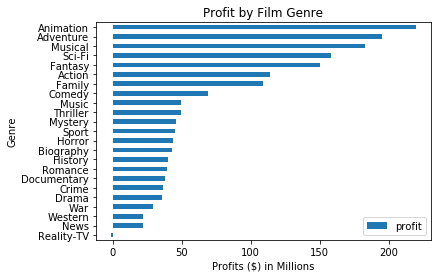

In [12]:
#graph profit_by_genre

ax = profit_by_genre.plot.barh(title = 'Profit by Film Genre')
ax.set_xlabel('Profits ($) in Millions')
ax.set_ylabel('Genre')
ax.set_yticks(profit_by_genre['genres'])
x_tick_labels = (profit_by_genre['profit'])/1000000
x_tick_labels.values

ax.set_xticks(range(0, 250, 50))



This visualization shows that Animation, Adventure, Musical, Sci-Fi, and Fantasy bring in the greatest profits. As we move further on, many of the questions that we want to answer are based upon what genre a studio would like to pick, so we will continue breaking the films down by genre for the next investigation:

# 2. How are these profits distributed within genres?

The next question that we want to answer for Microsoft is the risk vs reward for the top performing genres in the above analysis. We will show the distribution of profits for each genre, showing how reliable a film genre is to earn its budget back. 

In [188]:
#we will use the dataframe built from before, which already has genre rows expanded using the explode functio
df_merge
#using profit_by_genre, slicing df_merge to include only top_performing genres
top_genres = profit_by_genre['genres'][17:]
df_top_genres = df_merge.where(df_merge['genres'].isin(top_genres))
df_top_genres = df_top_genres.dropna()
#double checking that only top-performing genres are included
df_top_genres['genres'].unique()

array(['Action', 'Animation', 'Adventure', 'Fantasy', 'Sci-Fi', 'Musical'],
      dtype=object)

Text(0, 0.5, 'Genre')

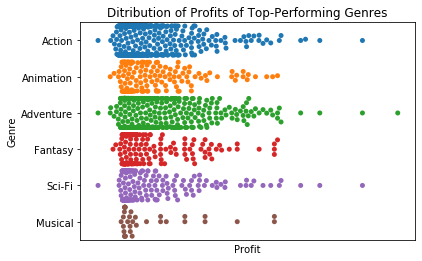

In [189]:
ax = sns.swarmplot(y = 'genres', x = 'profit', data = df_top_genres)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_title('Ditribution of Profits of Top-Performing Genres')
ax.set_xlabel('Profit')
ax.set_ylabel('Genre')

# 3. Should a studio appropriate a large part of their budget for a famous director?
The crew of a film often takes the greatest part of any budget. As these stars become more and more in demand, their paychecks swell to enourmous numbers, but is the correlation between their pricetag and the success of a film so related? Let's explore this by comparing the average ratings of a film to the number of films that a director is known for. If the director is a large part of what makes a movie successful (known as the $auteur$ theory), then we should see the movie ratings of directors known for more films be greater than the movie profits of lesser known directors. If this correlation does not exist, then we can conclude that a movie studio should not spend a large part of its budget on director costs, as the director does not contribute greatly to the movie's review. 

In [190]:
#slice imdb_name_basics to include only directors
imdb_directors = imdb_name_basics.where(imdb_name_basics['primary_profession'].str.contains('director'))
imdb_directors = imdb_directors.dropna()
#get count of number of films known for
imdb_directors['known_for_titles'] = list(map(lambda x: x.split(','), imdb_directors['known_for_titles']))
num_known_for = []
for titles in imdb_directors['known_for_titles']:
    num_known_for.append(len(titles))
imdb_directors['num_known_for'] = num_known_for
#expand rows by known_for_titles using explode
imdb_directors_expanded = imdb_directors.explode('known_for_titles').reset_index(drop = True)
imdb_directors_expanded

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,num_known_for
0,nm0083767,Fernando Birri,1925.0,2017.0,"director,actor,writer",tt0286104,4
1,nm0083767,Fernando Birri,1925.0,2017.0,"director,actor,writer",tt0056102,4
2,nm0083767,Fernando Birri,1925.0,2017.0,"director,actor,writer",tt0078039,4
3,nm0083767,Fernando Birri,1925.0,2017.0,"director,actor,writer",tt0096077,4
4,nm0101055,George Bowers,1944.0,2012.0,"editor,director,actor",tt0120681,4
...,...,...,...,...,...,...,...
5346,nm8289928,Arthur MacCaig,1948.0,2008.0,"director,cinematographer,editor",tt8421302,4
5347,nm8289928,Arthur MacCaig,1948.0,2008.0,"director,cinematographer,editor",tt7691988,4
5348,nm8289928,Arthur MacCaig,1948.0,2008.0,"director,cinematographer,editor",tt5885972,4
5349,nm8289928,Arthur MacCaig,1948.0,2008.0,"director,cinematographer,editor",tt10166724,4


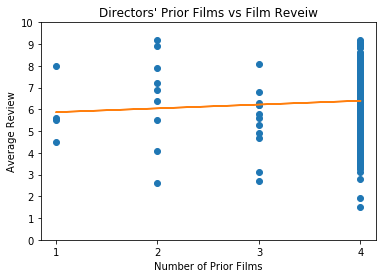

In [191]:
#rename imdb_title_ratings[tconst] in order to merge with imdb_directors properly
imdb_title_ratings = imdb_title_ratings.rename(columns = {'tconst' : 'known_for_titles'})
imdb_title_ratings
dir_rating_merge = pd.merge(imdb_directors_expanded, imdb_title_ratings, on = 'known_for_titles', how = 'inner')
#no longer need title codes
dir_rating_merge = pd.concat([dir_rating_merge['num_known_for'], dir_rating_merge['averagerating']], axis = 1)
dir_rating_merge
#scatter plot and line of best fit to show trend
x = dir_rating_merge['num_known_for']
y = dir_rating_merge['averagerating']
m, b = np.polyfit(x, y, 1)
ax = plt.subplot()
plt.plot(x, y, 'o')
plt.plot(x, m*x+b)
plt.xlabel('Number of Prior Films')
plt.ylabel('Average Review')
plt.title("Directors' Prior Films vs Film Reveiw")
ax.set_xticks(range(1, 5, 1))
ax.set_yticks(range(0, 11, 1))

From the visualization above, the number of films that a director is known for is only slightly correlated to the average review of the film. From this, we can say that the director is not as big as a part of the success of a film as some may say, and when deciding who to hire for this venture, a big name with a big price tag does not necessarily guarantee a successful film. I suggest that a director's past record of films be not considered when deciding who to hire. 

# 4. How has COVID-19 affected the theater market vs streaming markets?
We wouldn't be doing our due diligence if we did not consider what effect the COVID-19 pandemic will have on the movie industry. Because movies are a luxury good, they are often hit the hardest by economic factors. 
What is different about COVID-19 is the regulation on social distancing. As long as social distancing orders stand, patrons will likely avoid movie theatres altogether for the foreseeable future. Services that pick up this slack are streaming companies such as Netflix, HBO, and Hulu. Let's investigate the difference in success between films that release in theatres versus films that stream to patrons' homes. 
Because these streaming services do not readily provide their revenue per film, viewership, or any metric to accurately guage how successful a film is, we need to measure an aggregate of the success of these companies as a whole. Because we are comparing theatre releases to streaming releases, we will use AMC stock prices (one of the largest movie theatre chains in the US), and Netflix stock prices, the leader in streaming markets. 

In [192]:
amc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-29,11.30,11.4500,10.93,11.4500,10.925329,2746700
1,2019-07-30,11.34,11.7400,11.13,11.7400,11.202041,2778100
2,2019-07-31,11.75,11.9800,11.55,11.8300,11.287916,2818700
3,2019-08-01,11.70,11.8200,11.04,11.2600,10.744036,4601900
4,2019-08-02,11.20,11.6400,11.08,11.6200,11.087539,2870100
...,...,...,...,...,...,...,...
249,2020-07-23,4.08,4.1800,4.00,4.0600,4.060000,3614300
250,2020-07-24,4.00,4.1800,3.96,4.0000,4.000000,3282400
251,2020-07-27,4.01,4.0300,3.81,3.8700,3.870000,2980500
252,2020-07-28,3.85,4.2500,3.84,4.1500,4.150000,6003900


In [193]:
netflix

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-29,335.980011,336.399994,328.769989,332.700012,332.700012,5782800
1,2019-07-30,329.200012,329.649994,323.230011,325.929993,325.929993,6029300
2,2019-07-31,325.160004,331.769989,318.529999,322.989990,322.989990,6259500
3,2019-08-01,324.250000,328.579987,318.739990,319.500000,319.500000,6563200
4,2019-08-02,317.489990,319.410004,311.799988,318.829987,318.829987,6280300
...,...,...,...,...,...,...,...
249,2020-07-23,491.130005,491.899994,472.019989,477.579987,477.579987,7722000
250,2020-07-24,468.769989,487.170013,467.540009,480.450012,480.450012,7746200
251,2020-07-27,484.510010,496.920013,482.309998,495.649994,495.649994,7863100
252,2020-07-28,496.019989,497.790009,487.760010,488.510010,488.510010,5978100


In [194]:
#we only need one column to plot against, as these are daily prices. Here we use 'Close'
amc_close = pd.concat([amc['Date'], amc['Close']], axis = 1)
amc_close

,Date,Close
0,2019-07-29,11.4500
1,2019-07-30,11.7400
2,2019-07-31,11.8300
3,2019-08-01,11.2600
4,2019-08-02,11.6200
...,...,...
249,2020-07-23,4.0600
250,2020-07-24,4.0000
251,2020-07-27,3.8700
252,2020-07-28,4.1500


In [195]:
#rename Close column to AMC Price in order to distinguish from Netflix later
amc_close = amc_close.rename(columns = {'Close' : 'AMC Price'})

In [196]:
netflix
netflix_close = pd.concat([netflix['Date'], netflix['Close']], axis = 1)


In [197]:
netflix_close = netflix_close.rename(columns = {'Close' : 'Netflix Price'})

Text(0.5, 1.0, 'AMC Stock')

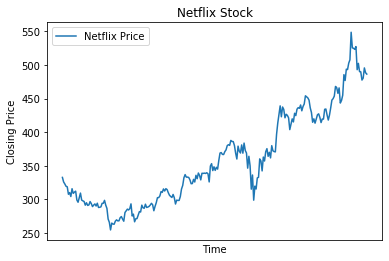

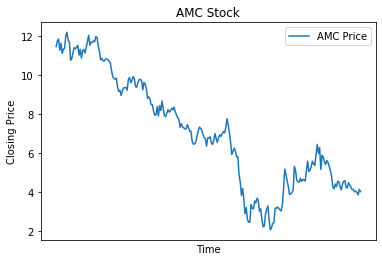

In [198]:
ax = netflix_close.plot(x = 'Date')
ax.set_xlabel('Time')
ax.set_xticks([])
ax.set_ylabel('Closing Price')
ax1 = amc_close.plot(x = 'Date')
ax1.set_xlabel('Time')
ax1.set_xticks([])
ax1.set_ylabel('Closing Price')
ax.set_title('Netflix Stock')
ax1.set_title('AMC Stock')


It is clear to see that netflix and amc stock prices have had a negative relationship in the last year. We wanted to show that while theatre releases are failing in the wake of COVID-19, streaming services remain unaffected and even benefiting from the change in media supply. 
Deciding to enter the film industry at this time is dangerous, especially if the studio is attempting to release their film in theaters. 
Depending on the profit a studio can secure through licensing fees paid by these streaming services, it may be beneficial to partner with one of these streamers rather than attempt a theater release. 

In order to provide a definitive answer to whether or not licensing is better than a theater release, additional data would need to be provided. There was not enough publicly available data on Netflix licensing fees to make a reasonable comparison between the success of those films versus film releases. 

In conclusion, a new movie studio needs to make a multitude of decisions before their first step can even be taken. Questions like what genre they will break out in, what the crew experience should be, and what market the film will be released in. The major takeaways that I would encourage are that large profits by genre on average do not necessarily guarantee success, as shown through our distrubution of profit, a director's past experience does not strongly correlate to the success of future films, and COVID-19 has devastaded theater markets, making streaming markets a possible other route to take when deciding how to release the film.

Thank you for your time, and good luck making that movie!